<a href="https://colab.research.google.com/github/cvijit/mnist_tensorflow/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [13]:
mnist = tf.keras.datasets.mnist #28*28 images of hand written digits 0-9
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#normalise the data

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

#try with and without normalising the data and check the end results #comment the above two lines

#build the model
#deep neural network

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
#1st hidden layer
model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu))
#2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu))
#output layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train, epochs=5)

#Did the model fit or overfit?

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2829 - accuracy: 0.9178
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1192 - accuracy: 0.9640
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0806 - accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0587 - accuracy: 0.9813
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0458 - accuracy: 0.9851


In [14]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss,val_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1068 - accuracy: 0.9674
0.10682530701160431 0.9674000144004822


In [8]:
import matplotlib.pyplot as plt

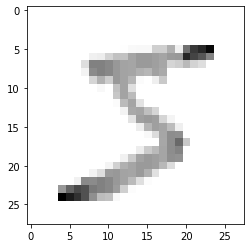

In [9]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [18]:
import os
os.getcwd()

'/content'

In [19]:
#saving model

model.save('/content/first_nn.model')

INFO:tensorflow:Assets written to: /content/first_nn.model/assets


In [20]:
new_model = tf.keras.models.load_model('first_nn.model')

In [21]:
predictions = new_model.predict([x_test])

In [22]:
print(predictions)

#predict always takes a list 
#it displays the one hot arrays i.e. probability distributions


[[1.4202987e-09 2.7402729e-09 7.8723401e-09 ... 9.9999964e-01
  1.3550149e-10 5.1490904e-08]
 [2.0054571e-08 6.4949098e-05 9.9992085e-01 ... 5.7982334e-09
  1.4298819e-09 9.9253704e-12]
 [8.1447901e-08 9.9864382e-01 4.6859013e-06 ... 1.0919817e-03
  2.1613679e-04 2.7735035e-05]
 ...
 [4.1530370e-09 7.1354911e-08 6.6277304e-09 ... 2.6660449e-05
  4.3461469e-06 2.3530100e-03]
 [4.1664081e-10 1.1252628e-09 7.5524920e-11 ... 6.7135661e-09
  1.2568962e-04 2.7089003e-10]
 [2.6721077e-06 5.7667343e-08 7.1309398e-07 ... 6.6616983e-11
  4.5139295e-08 3.6110368e-08]]


In [33]:
#using np to perfrom argmax #easier than tf
import numpy as np
print(np.argmax(predictions[3]))

0


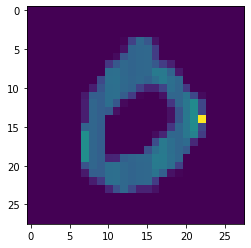

In [34]:
plt.imshow(x_test[3])
plt.show()